In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('kepler-exoplanet.csv')
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [100]:
#Reviewed our dataset, missing values, etc.
df.count()

rowid                9564
kepid                9564
kepoi_name           9564
kepler_name          2294
koi_disposition      9564
koi_pdisposition     9564
koi_score            8054
koi_fpflag_nt        9564
koi_fpflag_ss        9564
koi_fpflag_co        9564
koi_fpflag_ec        9564
koi_period           9564
koi_period_err1      9110
koi_period_err2      9110
koi_time0bk          9564
koi_time0bk_err1     9110
koi_time0bk_err2     9110
koi_impact           9201
koi_impact_err1      9110
koi_impact_err2      9110
koi_duration         9564
koi_duration_err1    9110
koi_duration_err2    9110
koi_depth            9201
koi_depth_err1       9110
koi_depth_err2       9110
koi_prad             9201
koi_prad_err1        9201
koi_prad_err2        9201
koi_teq              9201
koi_teq_err1            0
koi_teq_err2            0
koi_insol            9243
koi_insol_err1       9243
koi_insol_err2       9243
koi_model_snr        9201
koi_tce_plnt_num     9218
koi_tce_delivname    9218
koi_steff   

In [5]:
#Created new dataset "Kepler" with varibles of interest only
kepler = df[["kepid","koi_disposition", "koi_pdisposition", "koi_score","koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co","koi_fpflag_ec","koi_period"]]
kepler.head()

,kepid,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period
0,10797460,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036
1,10797460,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383
2,10811496,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140
3,10848459,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952
4,10854555,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592


In [6]:
#Reviewed missing values in variables of interest
kepler.count()

kepid               9564
koi_disposition     9564
koi_pdisposition    9564
koi_score           8054
koi_fpflag_nt       9564
koi_fpflag_ss       9564
koi_fpflag_co       9564
koi_fpflag_ec       9564
koi_period          9564
dtype: int64

In [7]:
#Dropped missing values
kepler.dropna(inplace=True)
kepler.count()

kepid               8054
koi_disposition     8054
koi_pdisposition    8054
koi_score           8054
koi_fpflag_nt       8054
koi_fpflag_ss       8054
koi_fpflag_co       8054
koi_fpflag_ec       8054
koi_period          8054
dtype: int64

In [8]:
X = kepler[["koi_pdisposition", "koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co","koi_fpflag_ec","koi_period"]]
y = kepler["koi_score"].values.reshape(-1, 1)
print(X.shape, y.shape)

(8054, 6) (8054, 1)


In [10]:
# Changed to categorical / dummy variables
data = X.copy()
data_binary_encoded = pd.get_dummies(data, columns=["koi_pdisposition"])
data_binary_encoded.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_pdisposition_CANDIDATE,koi_pdisposition_FALSE POSITIVE
0,0,0,0,0,9.488036,1,0
1,0,0,0,0,54.418383,1,0
2,0,1,0,0,19.899140,0,1
3,0,1,0,0,1.736952,0,1
4,0,0,0,0,2.525592,1,0


In [12]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_pdisposition_CANDIDATE,koi_pdisposition_FALSE POSITIVE
1842,0,0,0,0,37.865896,1,0
8266,0,0,1,1,0.933741,0,1
4730,0,1,1,1,25.956330,0,1
1281,0,1,0,0,1.525924,0,1
3428,0,0,1,0,1.906633,0,1


In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

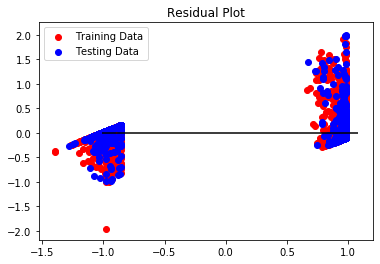

In [15]:
# Plotting the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="blue", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.05373049648042104, R2: 0.9462416654076187
